<a href="https://colab.research.google.com/github/subbugalam47/DSML-SCALER/blob/master/NLP_FlipItNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Probem Defination:**

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

In [ ]:
import gdown

# Replace 'YOUR_FILE_ID' with the actual file's ID
file_id = '1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u'

output_file = 'data.csv'

# Construct the direct download link
file_url = f'https://drive.google.com/uc?export=download&id={file_id}'

gdown.download(file_url,output_file,quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/data.csv
100%|██████████| 5.06M/5.06M [00:00<00:00, 23.1MB/s]


'data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,top_k_accuracy_score,confusion_matrix,classification_report
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Data Exploration**

In [ ]:
df = pd.read_csv('./data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: xlabel='Category', ylabel='count'>

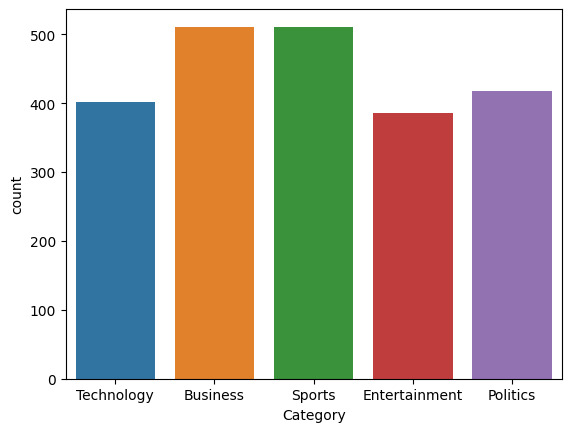

In [ ]:
sns.countplot(x="Category",data=df)

observation:no class is largely differ by other classes.
we can conclude that class imbalance is less.



**Preprocessing**

In [ ]:
# raw document of first article
df.iloc[:,1][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:

def preprocessing(sent):
  wl = WordNetLemmatizer()
  filtered_words = []

  sent = re.sub(r'[^A-Za-z0-9]+', ' ',sent)                   # removing non letters
  for word in word_tokenize(sent.lower()):                    # word tokenizing text

    if word not in set(stopwords.words('english')):           # removing stop words
      lmw = wl.lemmatize(word)                                # Lemmatizing text to root word
      filtered_words.append(lmw)
  return " ".join(filtered_words)

#text after preprocessing first document
preprocessing(df.iloc[:,1][0])


'tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel 

In [ ]:
# preprocessig text of all Articles
df['Article'] = df['Article'].apply(lambda x : preprocessing(x))

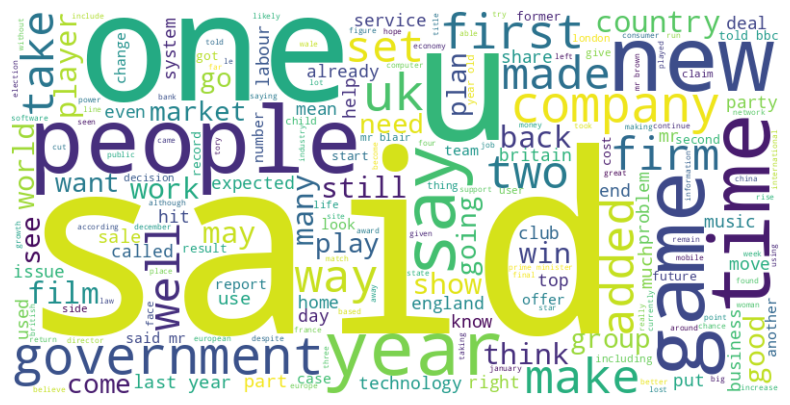

In [ ]:
wtext = " ".join(df['Article'])
wc = WordCloud(width=800,height=400,background_color='white').generate(wtext)
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

observation: we can check the preprocessed text where there are no stopwords,non letters.  

we can conclude preprocessing went well.

In [ ]:
# Encoding the text
label_encoder = LabelEncoder()

def Encoding(vectorizertype):

  if vectorizertype == "BoW":                                 # if choice is BoW
    vectorizer = CountVectorizer()
  elif vectorizertype == "TF-IDF":                            # if choice is TF-IDF
    vectorizer = TfidfVectorizer()
  else:
    raise ValueError('Invalid Choice')
  X = vectorizer.fit_transform(df['Article'])                 #
  y = label_encoder.fit_transform(df['Category'])             # encoding the target using Label encoder.

  return X,y

X,y = Encoding('TF-IDF')

**Model Training**

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print('train data shape',X_train.shape)
print('test data shape',X_test.shape)

train data shape (1668, 26244)
test data shape (557, 26244)


In [ ]:
# Naive Bayes model
nb_model = MultinomialNB()

In [ ]:
# fitting model to train data
nb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# output of test prediction
nb_model.predict(X_test)

array([2, 0, 1, 4, 3, 0, 0, 3, 3, 4, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 1, 1,
       0, 2, 2, 2, 2, 3, 1, 3, 2, 4, 2, 1, 0, 1, 4, 0, 4, 3, 0, 3, 1, 0,
       1, 1, 0, 3, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       3, 1, 0, 0, 4, 0, 4, 4, 4, 2, 4, 1, 0, 4, 0, 2, 2, 1, 2, 3, 3, 1,
       3, 3, 2, 1, 4, 0, 2, 0, 3, 2, 2, 4, 0, 4, 3, 3, 4, 0, 2, 0, 1, 2,
       3, 2, 2, 0, 4, 3, 3, 0, 2, 2, 2, 3, 2, 1, 1, 3, 4, 2, 3, 1, 4, 2,
       0, 0, 3, 4, 1, 0, 2, 2, 3, 0, 3, 1, 1, 3, 1, 1, 4, 0, 1, 4, 1, 0,
       4, 2, 3, 2, 2, 3, 2, 4, 3, 3, 0, 3, 4, 3, 2, 3, 0, 2, 0, 2, 4, 3,
       3, 1, 0, 3, 4, 4, 2, 4, 2, 4, 4, 4, 1, 2, 4, 4, 3, 0, 2, 4, 2, 4,
       0, 3, 2, 4, 4, 3, 3, 0, 1, 3, 0, 3, 2, 1, 0, 2, 3, 0, 0, 1, 3, 2,
       3, 2, 2, 2, 3, 1, 4, 1, 2, 0, 4, 2, 4, 1, 0, 3, 3, 2, 3, 3, 2, 0,
       0, 1, 1, 3, 2, 4, 3, 0, 2, 0, 3, 4, 3, 0, 0, 3, 4, 4, 1, 4, 1, 2,
       1, 2, 2, 3, 0, 2, 4, 4, 2, 1, 1, 3, 3, 0, 3, 4, 1, 4, 3, 3, 3, 2,
       1, 1, 3, 1, 0, 3, 3, 2, 0, 3, 4, 0, 0, 0, 2,

**Evalution of Model**

In [ ]:
# checking class output single sample
print("prediction class of model :",nb_model.predict(X_test[25])[0])
print('actual class :',y_test[25])

prediction class of model : 2
actual class : 2


In [ ]:
# prediction output of test data
y_pred = nb_model.predict(X_test)

In [ ]:
# Accuracy of test data

accuracy_score(y_test, y_pred)

0.9694793536804309

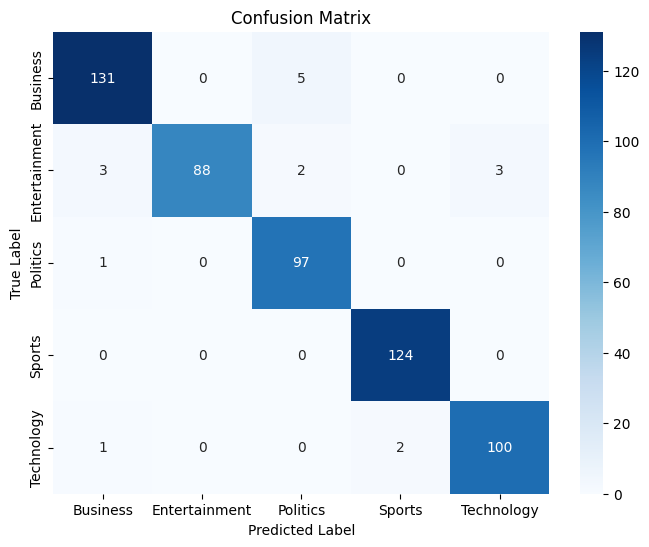

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Plot of confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Observation:

there aren't much miss classifications

**Comparision of Models**

In [ ]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(f"\n{type(model).__name__} Classification Report:\n", classification_report(y_test, predictions))
  print(f"{type(model).__name__} Confusion Matrix:\n", confusion_matrix(y_test, predictions))

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# MultinomialNB
train_evaluate_model(nb_model, X_train, X_test, y_train, y_test)


MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       1.00      0.92      0.96        96
           2       0.93      0.99      0.96        98
           3       0.98      1.00      0.99       124
           4       0.97      0.97      0.97       103

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

MultinomialNB Confusion Matrix:
 [[131   0   5   0   0]
 [  3  88   2   0   3]
 [  1   0  97   0   0]
 [  0   0   0 124   0]
 [  1   0   0   2 100]]


In [ ]:
# DecisionTreeClassifier
train_evaluate_model(dt_model, X_train, X_test, y_train, y_test)


DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       136
           1       0.88      0.81      0.84        96
           2       0.77      0.81      0.79        98
           3       0.90      0.92      0.91       124
           4       0.80      0.81      0.80       103

    accuracy                           0.83       557
   macro avg       0.83      0.83      0.83       557
weighted avg       0.83      0.83      0.83       557

DecisionTreeClassifier Confusion Matrix:
 [[108   3  13   2  10]
 [  6  78   2   4   6]
 [  9   2  79   5   3]
 [  4   1   3 114   2]
 [  8   5   6   1  83]]


In [ ]:
# KNeighborsClassifier
train_evaluate_model(knn_model, X_train, X_test, y_train, y_test)


KNeighborsClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       136
           1       0.95      0.93      0.94        96
           2       0.86      0.91      0.88        98
           3       0.96      1.00      0.98       124
           4       0.97      0.96      0.97       103

    accuracy                           0.94       557
   macro avg       0.93      0.94      0.93       557
weighted avg       0.94      0.94      0.94       557

KNeighborsClassifier Confusion Matrix:
 [[120   1  12   3   0]
 [  2  89   2   1   2]
 [  6   1  89   1   1]
 [  0   0   0 124   0]
 [  0   3   1   0  99]]


In [ ]:
# RandomForestClassifier
train_evaluate_model(rf_model, X_train, X_test, y_train, y_test)


RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       136
           1       0.99      0.95      0.97        96
           2       0.95      0.95      0.95        98
           3       0.97      0.98      0.98       124
           4       0.98      0.93      0.96       103

    accuracy                           0.96       557
   macro avg       0.96      0.95      0.96       557
weighted avg       0.96      0.96      0.96       557

RandomForestClassifier Confusion Matrix:
 [[130   0   4   1   1]
 [  3  91   0   1   1]
 [  5   0  93   0   0]
 [  1   0   1 122   0]
 [  4   1   0   2  96]]


Conclusion:

Amongst all Models 'MultinomialNB' performed better with 97% accuracy ,recall and f1-score followed by 'Randomforest' model.

